# Stock Prices II: Distribution of Returns

In [4]:
import pandas as pd

from tiingo import TiingoClient                       
tiingo = TiingoClient({'api_key':'f10f5d79cf2567b045cc7e9b595a6fec0f5321d2'})

import quandl  
quandl.ApiConfig.api_key = 'EqpCyveK1jFmUkmzpPjz'

import matplotlib.pyplot as plt                        # Basic plot library.
plt.style.use('ggplot')                                # Make plots look nice.

Get data for S&P 500 ETF:

In [5]:
data = tiingo.get_dataframe('SPY', '1900-1-1')   
data

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
1993-01-29 00:00:00+00:00,43.9375,43.9687,43.7500,43.9687,1003200,25.961948,25.980383,25.851157,25.980383,1003200,0.0,1.0
1993-02-01 00:00:00+00:00,44.2500,44.2500,43.9687,43.9687,480500,26.146599,26.146599,25.980383,25.980383,480500,0.0,1.0
1993-02-02 00:00:00+00:00,44.3437,44.3750,44.1250,44.2187,201300,26.201965,26.220459,26.072739,26.128104,201300,0.0,1.0
1993-02-03 00:00:00+00:00,44.8125,44.8437,44.3750,44.4062,529400,26.478971,26.497407,26.220459,26.238895,529400,0.0,1.0
1993-02-04 00:00:00+00:00,45.0000,45.0937,44.4687,44.9687,531500,26.589762,26.645128,26.275825,26.571267,531500,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-25 00:00:00+00:00,382.3300,391.8800,380.7789,390.4100,144712701,382.330000,391.880000,380.778900,390.410000,144712701,0.0,1.0
2021-02-26 00:00:00+00:00,380.3600,385.5800,378.2300,384.3500,149530614,380.360000,385.580000,378.230000,384.350000,149530614,0.0,1.0
2021-03-01 00:00:00+00:00,389.5800,390.9200,380.5720,385.5900,105348798,389.580000,390.920000,380.572000,385.590000,105348798,0.0,1.0


Get rid of time zone:

In [6]:
data.index = data.index.tz_convert(None)
data[-3:]

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2021-03-01,389.58,390.92,380.572,385.59,105348798,389.58,390.92,380.572,385.59,105348798,0.0,1.0
2021-03-02,386.54,390.07,386.000,389.82,79595332,386.54,390.07,386.000,389.82,79595332,0.0,1.0
2021-03-03,381.42,386.83,381.310,385.79,119940211,381.42,386.83,381.310,385.79,119940211,0.0,1.0


Calculate daily returns:

In [32]:
r_daily = data[['adjClose']].pct_change()
r_daily

,adjClose
date,
1993-01-29,NaN
1993-02-01,0.007112
1993-02-02,0.002118
1993-02-03,0.010572
1993-02-04,0.004184
...,...
2021-02-25,-0.024096
2021-02-26,-0.005153
2021-03-01,0.024240


What are the annual returns?

In [10]:
data.index.year

Int64Index([1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
           dtype='int64', name='date', length=7074)

In [16]:
# With groupby:
data[['adjClose']].groupby(data.index.year).last().pct_change()

,adjClose
date,
1993,NaN
1994,0.004019
1995,0.380251
1996,0.225543
1997,0.334780
1998,0.286873
1999,0.203875
2000,-0.097293
2001,-0.117525


In [20]:
# With resample:
data[['adjClose']].resample('A').last().pct_change()   #can use resample with max, min, mean, last, etc....'A' is for annual

,adjClose
date,
1993-12-31,NaN
1994-12-31,0.004019
1995-12-31,0.380251
1996-12-31,0.225543
1997-12-31,0.334780
1998-12-31,0.286873
1999-12-31,0.203875
2000-12-31,-0.097293
2001-12-31,-0.117525


Bar-plot this:

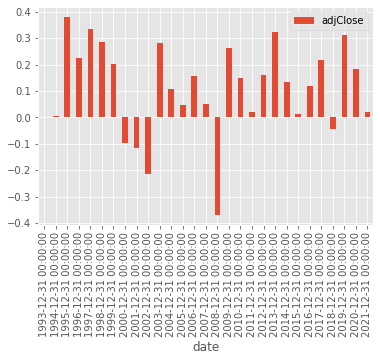

In [21]:
data[['adjClose']].resample('A').last().pct_change().plot.bar()

Monthly returns:

In [26]:
# With groupby
data[['adjClose']].groupby([data.index.year,data.index.month]).last().pct_change()

adjClose
date date          
1993 1          NaN
     2     0.010667
     3     0.022412
     4    -0.025589
     5     0.026970
...             ...
2020 11    0.108777
     12    0.037066
2021 1    -0.010190
     2     0.027806
     3     0.002787

[339 rows x 1 columns]

In [23]:
# With resample:
data[['adjClose']].resample('M').last().pct_change()

,adjClose
date,
1993-01-31,NaN
1993-02-28,0.010667
1993-03-31,0.022412
1993-04-30,-0.025589
1993-05-31,0.026970
...,...
2020-11-30,0.108777
2020-12-31,0.037066
2021-01-31,-0.010190


Or calculate monthly returns directly from daily returns:

In [38]:
r_daily.add(1).resample('M').prod().sub(1)

,adjClose
date,
1993-01-31,0.000000
1993-02-28,0.010667
1993-03-31,0.022412
1993-04-30,-0.025589
1993-05-31,0.026970
...,...
2020-11-30,0.108777
2020-12-31,0.037066
2021-01-31,-0.010190


All frequencies:

In [39]:
r_daily   =  data['adjClose'].pct_change()             # Daily returns as a series (only single bracket)
r_monthly =  r_daily.add(1).resample('M').prod().sub(1)
r_annual  =  r_daily.add(1).resample('A').prod().sub(1)                                               

Do returns predict returns?

In [41]:
t = pd.DataFrame(index=r_daily.index)

t['today']    = r_daily
t['tomorrow']    = r_daily.shift(-1)

t

,today,tomorrow
date,,
1993-01-29,NaN,0.007112
1993-02-01,0.007112,0.002118
1993-02-02,0.002118,0.010572
1993-02-03,0.010572,0.004184
1993-02-04,0.004184,-0.000696
...,...,...
2021-02-25,-0.024096,-0.005153
2021-02-26,-0.005153,0.024240
2021-03-01,0.024240,-0.007803


Scatter-plot this:

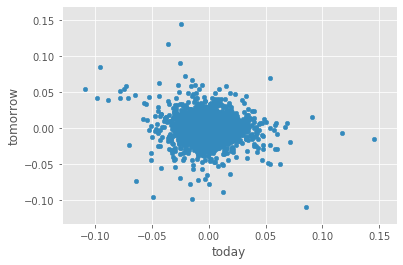

In [42]:
t.plot.scatter('today','tomorrow')

Autocorrelation:

In [44]:
r_daily.autocorr(1)   #in a perfectly efficient market this should be 0

-0.09045401581967706

In [45]:
r_monthly.autocorr(1)

0.03712685214044506

In [47]:
r_annual.autocorr(1)

0.06361313843053643

Volatility of returns:

In [49]:
# Annual data
r_annual.std()

0.17310321288226904

In [50]:
# Monthly data
r_monthly.std()

0.042134981854809246

In [52]:
r_monthly.std() * 12**.5

0.14595985869704467

In [51]:
# Daily data:
r_daily.std()

0.011891927785880132

In [53]:
r_daily.std() * 252**.5

0.18877850118346676

Get U.S. treasury rates from Quandl:

https://www.quandl.com/data/FRED/DGS10-10-Year-Treasury-Constant-Maturity-Rate

In [54]:
quandl.get(['FRED/DGS10']) 

,FRED/DGS10 - Value
Date,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03
...,...
2021-02-24,1.38
2021-02-25,1.54
2021-02-26,1.44


Get multiple rates:

In [55]:
rates = quandl.get(['FRED/FEDFUNDS','FRED/DGS1','FRED/DGS5','FRED/DGS10','FRED/DGS30']) / 100
rates

,FRED/FEDFUNDS - Value,FRED/DGS1 - Value,FRED/DGS5 - Value,FRED/DGS10 - Value,FRED/DGS30 - Value
Date,,,,,
1954-07-01,0.0080,NaN,NaN,NaN,NaN
1954-08-01,0.0122,NaN,NaN,NaN,NaN
1954-09-01,0.0107,NaN,NaN,NaN,NaN
1954-10-01,0.0085,NaN,NaN,NaN,NaN
1954-11-01,0.0083,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-02-24,NaN,0.0008,0.0062,0.0138,0.0224
2021-02-25,NaN,0.0009,0.0081,0.0154,0.0233
2021-02-26,NaN,0.0008,0.0075,0.0144,0.0217


Forward-fill missing values:

In [56]:
rates = rates.ffill()
rates[-5:]

,FRED/FEDFUNDS - Value,FRED/DGS1 - Value,FRED/DGS5 - Value,FRED/DGS10 - Value,FRED/DGS30 - Value
Date,,,,,
2021-02-24,0.0008,0.0008,0.0062,0.0138,0.0224
2021-02-25,0.0008,0.0009,0.0081,0.0154,0.0233
2021-02-26,0.0008,0.0008,0.0075,0.0144,0.0217
2021-03-01,0.0008,0.0008,0.0071,0.0145,0.0223
2021-03-02,0.0008,0.0008,0.0067,0.0142,0.0221


Plot this table:

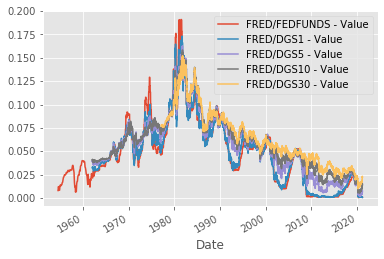

In [57]:
rates.plot()

Plot recent rates:

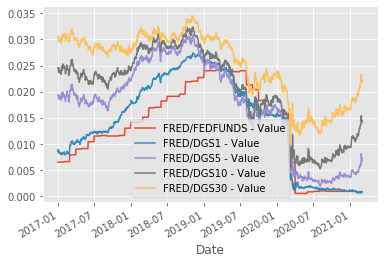

In [58]:
rates.loc['2017':].plot()

Annual 1-year rate::

In [61]:
rates['FRED/DGS1 - Value'].resample('A').first()

Date
1954-12-31       NaN
1955-12-31       NaN
1956-12-31       NaN
1957-12-31       NaN
1958-12-31       NaN
               ...  
2017-12-31    0.0085
2018-12-31    0.0176
2019-12-31    0.0263
2020-12-31    0.0159
2021-12-31    0.0010
Freq: A-DEC, Name: FRED/DGS1 - Value, Length: 68, dtype: float64

Annual market excess returns:

In [62]:
rx_annual = r_annual - rates['FRED/DGS1 - Value'].resample('A').first()
rx_annual

1954-12-31         NaN
1955-12-31         NaN
1956-12-31         NaN
1957-12-31         NaN
1958-12-31         NaN
                ...   
2017-12-31    0.208503
2018-12-31   -0.063171
2019-12-31    0.285917
2020-12-31    0.167832
2021-12-31    0.019167
Freq: A-DEC, Length: 68, dtype: float64

Historical risk premium:

In [64]:
rx_annual.mean()

0.08552159372632122

In [66]:
(r_annual - rates['FRED/DGS10 - Value'].resample('A').first()).mean()

0.07180435234701087